<a href="https://colab.research.google.com/github/syedshubha/QNET25_Shubha/blob/main/QNET25Sh1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet qutip
%pip install --quiet qiskit
%pip install --quiet qiskit-aer
%pip install --quiet pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 10.7 MB/s eta 0:00:00


In [ ]:
from qutip import *
import numpy as np
from qiskit import *
from qiskit.quantum_info import *

from qiskit.quantum_info import Statevector, random_statevector, partial_trace
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt

In [ ]:
def create_teleportation_circuit(custom_state):
    qc = QuantumCircuit(3, 2)
    qc.initialize(custom_state, 0)

    #Create an EPR pair
    qc.h(1)
    qc.cx(1, 2)

    #Bell basis measurement
    qc.cx(0, 1)
    qc.h(0)
    qc.measure(0, 0)
    qc.measure(1, 1)

    #Conditional operations on Bob's qubit
    qc.x(2).c_if(0, 1)  # Apply X if classical bit 0 is 1
    qc.z(2).c_if(1, 1)  # Apply Z if classical bit 1 is 1

    return qc

<ipython-input-3-86f9181072ac>:16: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(2).c_if(0, 1)  # Apply X if classical bit 0 is 1
<ipython-input-3-86f9181072ac>:17: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(2).c_if(1, 1)  # Apply Z if classical bit 1 is 1


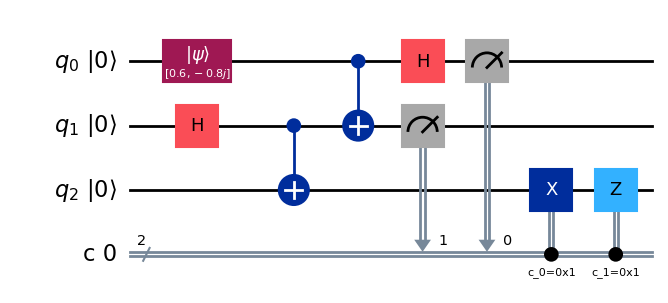

In [ ]:
import warnings
custom_state = [0.6, -0.8j]
qc = create_teleportation_circuit(custom_state)
warnings.filterwarnings("ignore", category=DeprecationWarning)
qc.draw(output="mpl", initial_state=True)

In [ ]:
zero = basis(2, 0)
one = basis(2, 1)

bell_state = (tensor(zero, zero) + tensor(one, one)).unit()

In [ ]:
# Define parameters for noise
gamma_amp = 0.1  # Amplitude damping probability

# Amplitude damping operators
E0_amp = Qobj([[1, 0], [0, np.sqrt(1 - gamma_amp)]])  # No error
E1_amp = Qobj([[0, np.sqrt(gamma_amp)], [0, 0]])      # Amplitude damping error


# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

# Apply amplitude damping on the first qubit
K0_amp = tensor(E0_amp,I)
K1_amp = tensor(E1_amp,I)
rho_after_amp = K0_amp * rho * K0_amp.dag() + K1_amp * rho * K1_amp.dag()


# Print results
print("Initial Bell state density matrix:")
print(rho)
print("\nDensity matrix after amplitude damping on first qubit:")
print(rho_after_amp)

Initial Bell state density matrix:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

Density matrix after amplitude damping on first qubit:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.         0.         0.47434165]
 [0.         0.05       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47434165 0.         0.         0.45      ]]


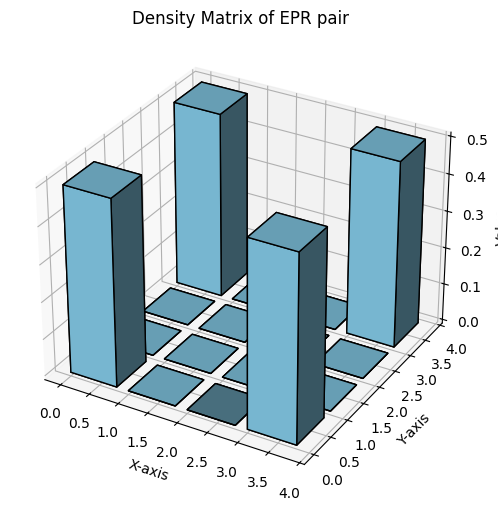

In [ ]:
#manual
rho = np.zeros((4, 4))
rho[[0, 0, 3, 3], [0, 3, 0, 3]] = 0.5
x, y = np.meshgrid(np.arange(rho.shape[0]), np.arange(rho.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

dx = dy = 0.8  # Width of each bar
dz =  np.array(rho).flatten() # Heights from the matrix

# Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair")

# Show the plot
plt.show()

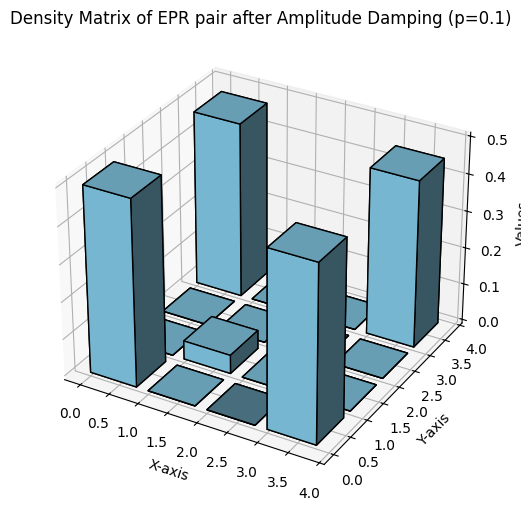

In [ ]:
rho_final = np.zeros((4, 4))

rho_final[0, 0] = 0.5
rho_final[0, 3] = 0.47434165
rho_final[1, 1] = 0.05
rho_final[3, 0] = 0.47434165
rho_final[3, 3] = 0.45

x, y = np.meshgrid(np.arange(rho_final.shape[0]), np.arange(rho_final.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho_final).flatten() # Heights from the matrix

# Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair after Amplitude Damping (p=0.1)")

# Show the plot
plt.show()

In [ ]:
gamma_phase = 0.6  # Phase damping probability
# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

# Phase damping operators
E0_phase = Qobj([[np.sqrt(gamma_phase), 0], [0, 0]])
E1_phase = Qobj([[0, 0], [0, np.sqrt(gamma_phase)]])
E2_phase = Qobj([[np.sqrt(1-gamma_phase), 0], [0, np.sqrt(1-gamma_phase)]])
# Apply phase damping on the first qubit
K0_phase = tensor(I,E0_phase)
K1_phase = tensor(I,E1_phase)
K2_phase = tensor(I,E2_phase)
rho_after_phase = K0_phase * rho * K0_phase.dag() + K1_phase * rho * K1_phase.dag() + K2_phase * rho * K2_phase.dag()


# Print results
print("\nDensity matrix after phase damping on second qubit:")
print(rho_after_phase)


Density matrix after phase damping on second qubit:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.2]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.2 0.  0.  0.5]]


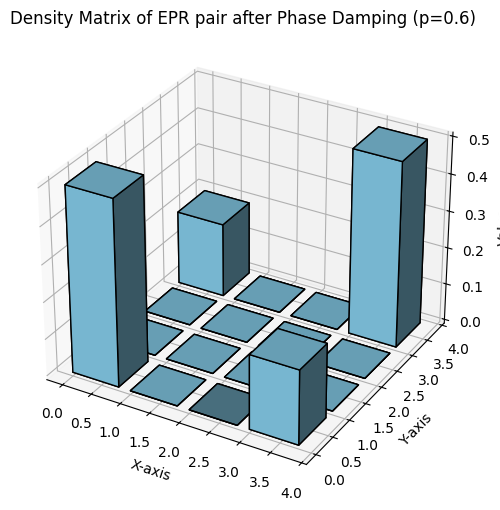

In [ ]:
rho_final = np.zeros((4, 4))

rho_final[0, 0] = 0.5
rho_final[0, 3] = 0.2
rho_final[3, 0] = 0.2
rho_final[3, 3] = 0.5

x, y = np.meshgrid(np.arange(rho_final.shape[0]), np.arange(rho_final.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho_final).flatten() # Heights from the matrix

# Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair after Phase Damping (p=0.6)")

# Show the plot
plt.show()

In [ ]:
# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

rho_after_amp = K0_amp * rho * K0_amp.dag() + K1_amp * rho * K1_amp.dag()
rho_after_phase_amp = K0_phase * rho_after_amp * K0_phase.dag() + K1_phase * rho_after_amp * K1_phase.dag() + K2_phase * rho_after_amp * K2_phase.dag()


# Print results
print(rho_after_phase_amp)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.         0.         0.18973666]
 [0.         0.05       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18973666 0.         0.         0.45      ]]


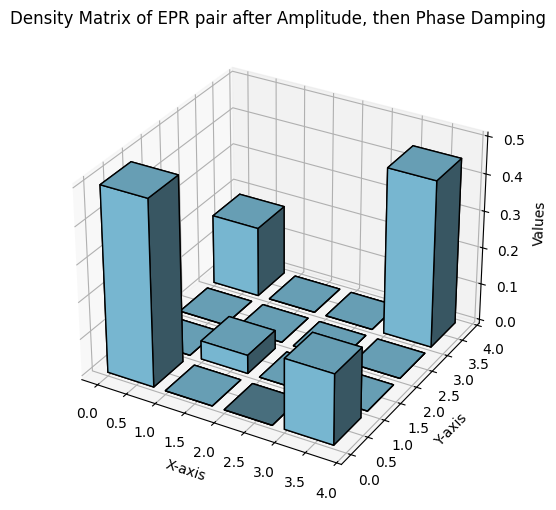

In [ ]:
rho_final = np.zeros((4, 4))

rho_final[0, 0] = 0.5
rho_final[0, 3] = 0.18973666
rho_final[1, 1] = 0.05
rho_final[3, 0] = 0.18973666
rho_final[3, 3] = 0.45

x, y = np.meshgrid(np.arange(rho_final.shape[0]), np.arange(rho_final.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho_final).flatten() # Heights from the matrix

# Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair after Amplitude, then Phase Damping")

# Show the plot
plt.show()

In [ ]:
# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

rho_after_phase = K0_phase * rho * K0_phase.dag() + K1_phase * rho * K1_phase.dag() + K2_phase * rho * K2_phase.dag()
rho_after_amp_phase = K0_amp * rho_after_phase * K0_amp.dag() + K1_amp * rho_after_phase * K1_amp.dag()


# Print results
print(rho_after_amp_phase)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.         0.         0.18973666]
 [0.         0.05       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18973666 0.         0.         0.45      ]]


In [ ]:
K0_amp = tensor(I, E0_amp)
K1_amp = tensor(I,E1_amp)

# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

rho_after_phase = K0_phase * rho * K0_phase.dag() + K1_phase * rho * K1_phase.dag() + K2_phase * rho * K2_phase.dag()
rho_after_amp_phase = K0_amp * rho_after_phase * K0_amp.dag() + K1_amp * rho_after_phase * K1_amp.dag()



# Print results
print(rho_after_phase_amp)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.         0.         0.18973666]
 [0.         0.         0.         0.        ]
 [0.         0.         0.05       0.        ]
 [0.18973666 0.         0.         0.45      ]]


In [ ]:
def generate_stabilizer_circuit(stabilizers, num_data_qubits, num_ancilla_qubits):
    qc = QuantumCircuit(num_data_qubits + num_ancilla_qubits, num_ancilla_qubits)

    # Prepare the logical |0> state
    qc.x(0)

    # Encode the logical qubit
    for i in range(1, num_data_qubits):
        qc.cx(0, i)

    # Measure the stabilizers
    for i, stabilizer in enumerate(stabilizers):
        qc.barrier()
        qc.h(num_data_qubits + i)
        for j, pauli in enumerate(stabilizer):
            if pauli == 'X':
                qc.cx(j, num_data_qubits + i)
            elif pauli == 'Z':
                qc.cz(j, num_data_qubits + i)
        qc.barrier()
        qc.measure(num_data_qubits + i, i)

    # Correct errors
    for i in range(num_ancilla_qubits):
        qc.x(0).c_if(i, 1)

    return qc

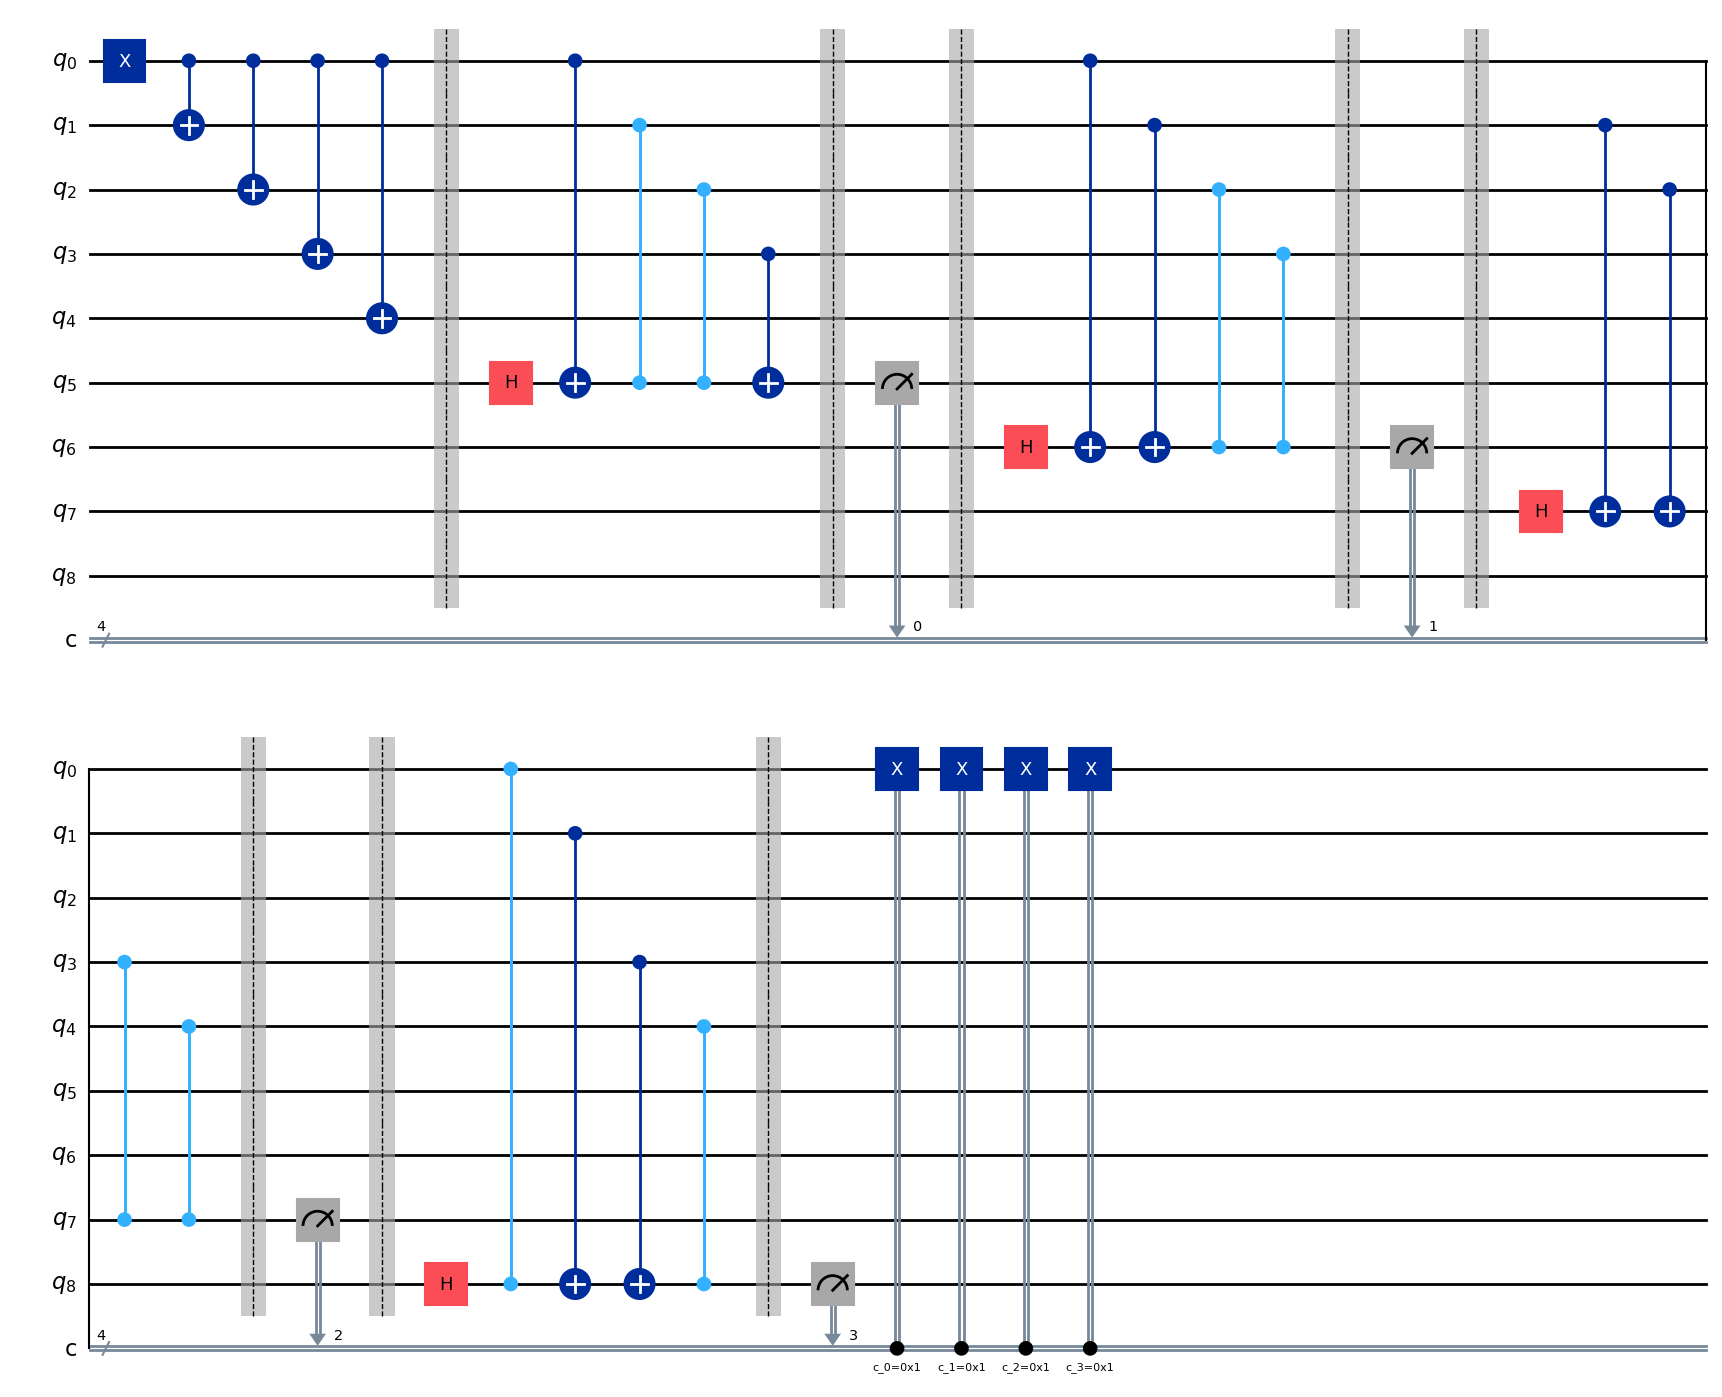

In [ ]:
#Define the stabilizers for the 5-qubit code
stabilizers = [
    ['X', 'Z', 'Z', 'X', 'I'],
    ['X', 'X', 'Z', 'Z', 'I'],
    ['I', 'X', 'X', 'Z', 'Z'],
    ['Z', 'X', 'I', 'X', 'Z']
]

qc = generate_stabilizer_circuit(stabilizers, 5, 4)

qc.draw(output='mpl')

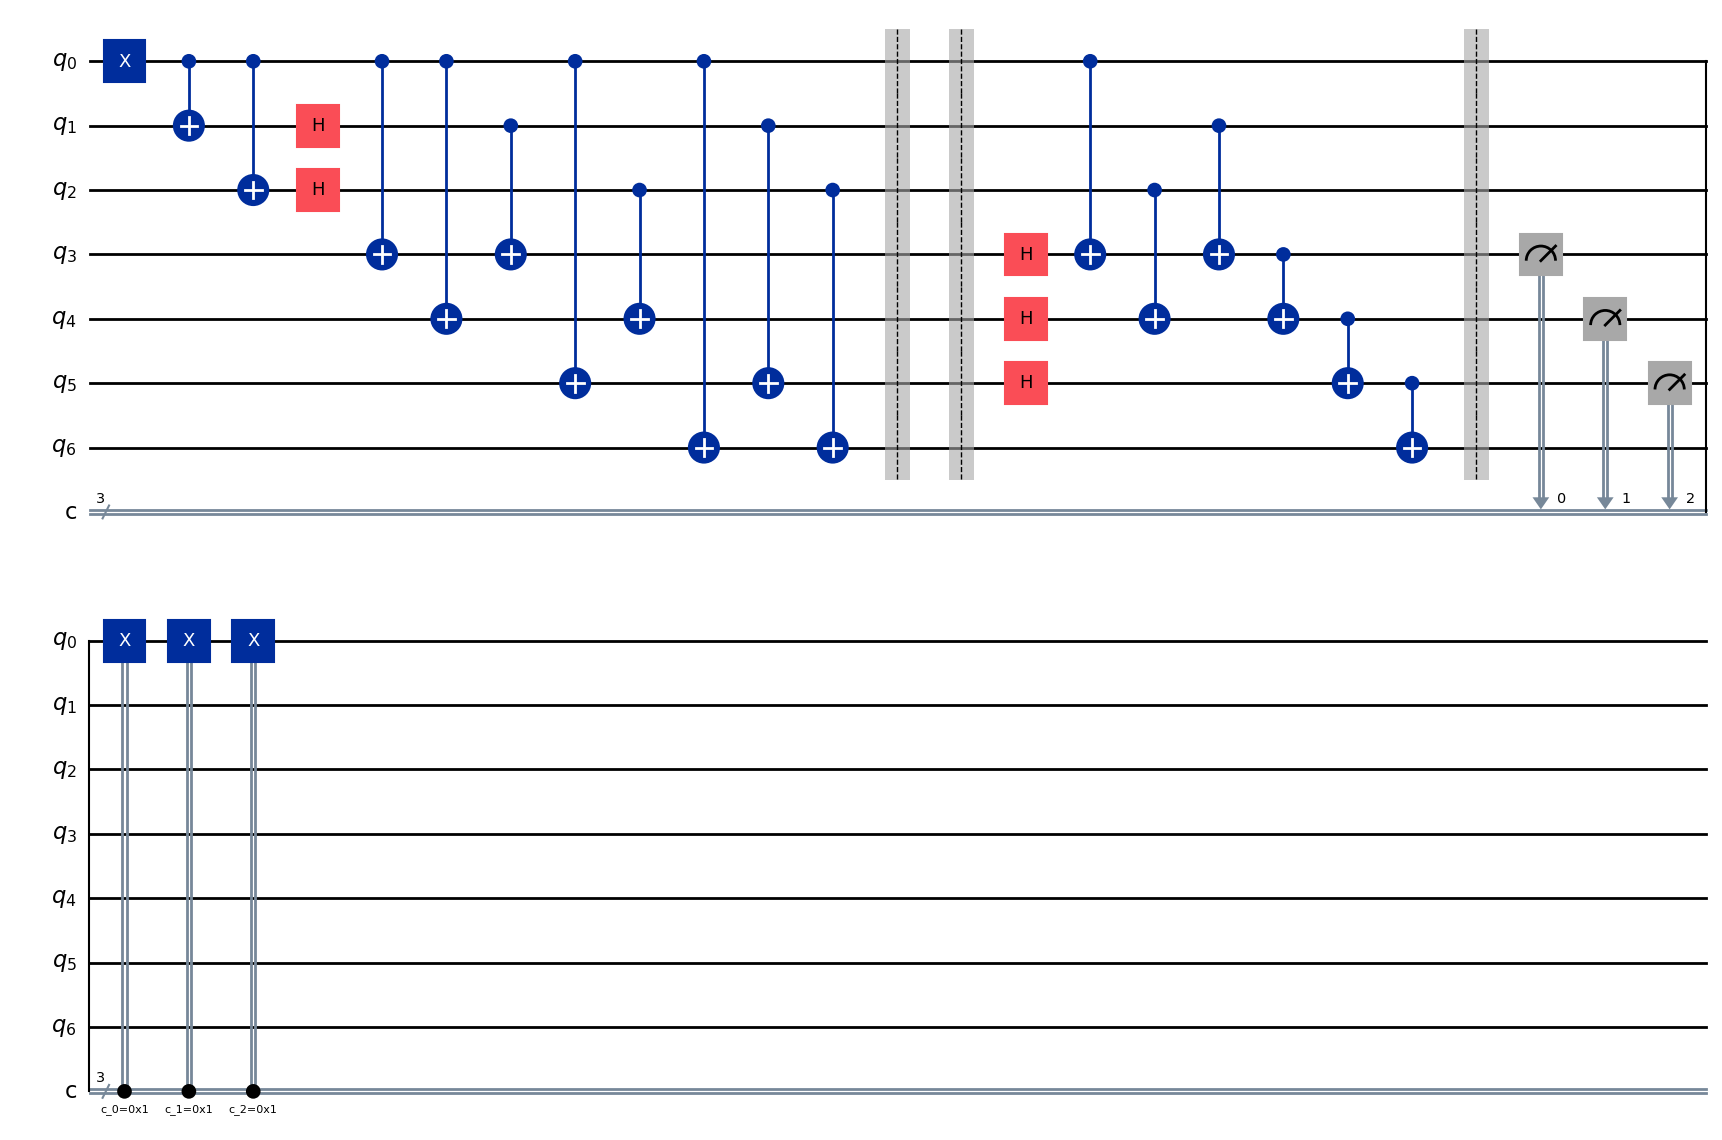

In [ ]:
def steane_code():
    qc = QuantumCircuit(7, 3)

    # Prepare the logical |0state
    qc.x(0)

    # Encode the logical qubit
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(0, 3)
    qc.cx(0, 4)
    qc.cx(0, 5)
    qc.cx(0, 6)

    # Entangle the qubits
    qc.h(1)
    qc.cx(1, 3)
    qc.cx(1, 5)

    qc.h(2)
    qc.cx(2, 4)
    qc.cx(2, 6)

    qc.barrier()

    # Measure the stabilizers
    qc.barrier()
    qc.h([3, 4, 5])
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 4)
    qc.cx(3, 4)
    qc.cx(4, 5)
    qc.cx(5, 6)
    qc.barrier()
    qc.measure([3, 4, 5], [0, 1, 2])

    # Correct errors
    qc.x(0).c_if(0, 1)
    qc.x(0).c_if(1, 1)
    qc.x(0).c_if(2, 1)

    return qc

steane_circuit = steane_code()
steane_circuit.draw(output='mpl')

In [ ]:
from scipy.optimize import minimize
from scipy.linalg import logm

def von_neumann_entropy(rho):
    eigenvalues = rho.eigenenergies()
    eigenvalues = eigenvalues[eigenvalues > 0]  # Ignore zero eigenvalues
    return -np.sum(eigenvalues * np.log2(eigenvalues))

In [ ]:
# Quantum Mutual Information
def quantum_mutual_information(rho):
    rho_A = rho.ptrace(0)  # Partial trace over B
    rho_B = rho.ptrace(1)  # Partial trace over A
    return von_neumann_entropy(rho_A) + von_neumann_entropy(rho_B) - von_neumann_entropy(rho)

# Classical Mutual Information
def classical_mutual_information(rho):
    def conditional_entropy(proj_ops):
        total_entropy = 0
        for proj in proj_ops:
            rho_k = (proj * rho * proj.dag()).unit() if (proj * rho * proj.dag()).norm() != 0 else None
            p_k = (proj * rho * proj.dag()).norm()
            if p_k > 0 and rho_k is not None:
                total_entropy += p_k * von_neumann_entropy(rho_k.ptrace(0))
        return total_entropy

    # Measurement basis on the second subsystem (B)
    proj_ops = [basis(2, 0) * basis(2, 0).dag(), basis(2, 1) * basis(2, 1).dag()]
    return von_neumann_entropy(rho.ptrace(0)) - conditional_entropy(proj_ops)

# Quantum Discord
def quantum_discord(rho):
    return quantum_mutual_information(rho) - classical_mutual_information(rho)

In [ ]:
# Concurrence for two-qubit state
def concurrence(rho):
    Y = Qobj([[0, -1j], [1j, 0]])  # Pauli Y
    R = rho * tensor(Y, Y) * rho.conj() * tensor(Y, Y)
    eigenvalues = np.sqrt(np.real(np.sort(R.eigenenergies())[::-1]))
    return max(0, eigenvalues[0] - sum(eigenvalues[1:]))

# Entanglement of Formation
def entanglement_of_formation(rho):
    C = concurrence(rho)
    if C == 0:
        return 0
    h = lambda x: -x * np.log2(x) - (1 - x) * np.log2(1 - x) if x > 0 else 0
    return h((1 + np.sqrt(1 - C**2)) / 2)

In [ ]:
# Calculate Quantum Discord and Entanglement of Formation for Bell State
discord = quantum_discord(rho)
eof = entanglement_of_formation(rho)

# Output results
print(f"Quantum Discord: {discord:.6f}")
print(f"Entanglement of Formation: {eof:.6f}")


TypeError: incompatible dimensions [[2], [2]] and [[2, 2], [2, 2]]